# Exercises

#### 1. What is the fundamental idea behind Support Vector Machines? 

A SVM classifier is, in the most basic terms, a method to separate classes of instances by establishing the widest possible margin between classes, assuming those lie close together in the feature space. In the case of a 2-d problem (2 features), that would mean fiding the largest straight "strip" or "street" that separate the classes. In the regression case the objective is the opposite: it is to find the margin that encompasses the most instances. In both cases it is desirable to limit the margin violations.

#### 2. What is a support vector?  

Support Vectors are instances that lie in the limit of the margin, which essentially defines the width of the margin.

#### 3. Why is it important to scale the inputs when using SVMs?

If the scales of the features are too discrepant, the separation of the classes in the feature space might be problematic...

#### 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability? 

Although, in the case of Soft Margin classifications, during training you may accept some margin violations, the amount of which are determined by the slack variable, in the end all predictions are made based on the decision function alone, which in the 2-D case it is a straight line. Therefore the classification is binary (which side of the decision function the instance lies) and does not involve any probability estimation.

#### Book answer: An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.

#### 5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

When the number of instances is way larger than the number of features, it is faster to solve the primal problem. This is due to the fact that, when defining the Lagrangian of the problem, the solutions are given by finding m Lagrange multipliers, m being the number of instances. The scikit-learn's SVC class scales with O(m²xn) to O(m³xn).

#### 6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ ( gamma )? What about C ?

Gamma and C must be increased to obtain less regularization (more variance). When using Gauss-RBF, gamma is proportional to 1/(sigma²), where sgima is the width of the gaussian kernel. Therefore increasing it is making sigma small, making the borders have more "wrinkles" and be less smooth. On the other hand incresing C forces the slack variables be smaller, and accepting less margin violations, forcing the model to overfit.

#### 7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
X = iris['data'][: ,(2,3)] # selects only petal length and width

In [6]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
y = iris['target']

In [8]:
setosa_or_versicolor = (y == 0) | (y == 1) # the third class is not liearly separable
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_sc = scaler.fit_transform(X)

In [12]:
X_sc

array([[-1.01297765, -1.04211089],
       [-1.01297765, -1.04211089],
       [-1.08231219, -1.04211089],
       [-0.94364311, -1.04211089],
       [-1.01297765, -1.04211089],
       [-0.80497402, -0.68644165],
       [-1.01297765, -0.86427627],
       [-0.94364311, -1.04211089],
       [-1.01297765, -1.04211089],
       [-0.94364311, -1.21994552],
       [-0.94364311, -1.04211089],
       [-0.87430856, -1.04211089],
       [-1.01297765, -1.21994552],
       [-1.22098127, -1.21994552],
       [-1.15164673, -1.04211089],
       [-0.94364311, -0.68644165],
       [-1.08231219, -0.68644165],
       [-1.01297765, -0.86427627],
       [-0.80497402, -0.86427627],
       [-0.94364311, -0.86427627],
       [-0.80497402, -1.04211089],
       [-0.94364311, -0.68644165],
       [-1.29031581, -1.04211089],
       [-0.80497402, -0.50860702],
       [-0.66630494, -1.04211089],
       [-0.87430856, -1.04211089],
       [-0.87430856, -0.68644165],
       [-0.94364311, -1.04211089],
       [-1.01297765,

In [13]:
len(X_sc)

100

(array([37., 13.,  0.,  1.,  4., 11., 20., 14.]),
 array([1.    , 1.5125, 2.025 , 2.5375, 3.05  , 3.5625, 4.075 , 4.5875,
        5.1   ]),
 <BarContainer object of 8 artists>)

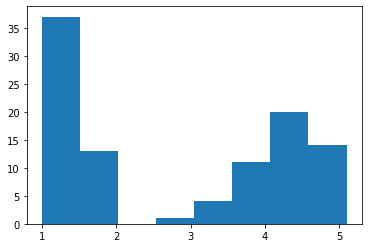

In [14]:
plt.hist(X[:,0], bins='auto')

(array([41.,  8.,  1.,  0., 10., 18., 17.,  5.]),
 array([0.1   , 0.3125, 0.525 , 0.7375, 0.95  , 1.1625, 1.375 , 1.5875,
        1.8   ]),
 <BarContainer object of 8 artists>)

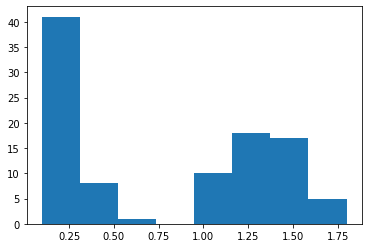

In [15]:
plt.hist(X[:,1], bins='auto')

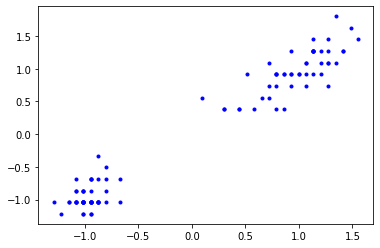

In [16]:
plt.plot(X_sc[:,0], X_sc[:,1], 'b.')

In [17]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(loss='hinge', verbose=3, C=10)

In [18]:
lin_svc.fit(X,y)

[LibLinear]

LinearSVC(C=10, loss='hinge', verbose=3)

In [19]:
lin_svc.get_params

<bound method BaseEstimator.get_params of LinearSVC(C=10, loss='hinge', verbose=3)>

In [20]:
lin_svc.coef_

array([[0.9301428 , 1.39555551]])

In [21]:
lin_svc.intercept_

array([-3.32553947])

In [22]:
w = lin_svc.coef_
b = lin_svc.intercept_

In [23]:
w[0]

array([0.9301428 , 1.39555551])

In [24]:
w[0,0]

0.9301428041495631

In [25]:
w[0,1]

1.3955555083443298

In [26]:
xmin = 0
xmax = 5.5

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0,0]/w[0,1] * x0 - b[0]/w[0,1]

margin = 1/w[0,1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

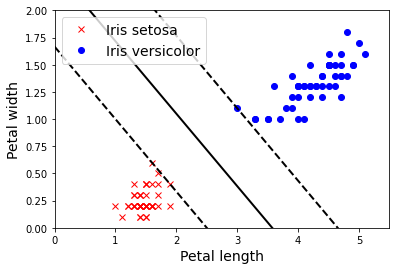

In [27]:
plt.axis([0,5.5,0,2])
plt.plot(X[:,0][y==0],X[:,1][y==0], 'rx', label='Iris setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'bo', label='Iris versicolor')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [57]:
from sklearn.svm import SVC

svc = SVC(C=20, kernel='linear')
svc.fit(X,y)

SVC(C=20, kernel='linear')

In [58]:
svc.coef_

array([[1.29411744, 0.82352928]])

In [59]:
w = svc.coef_
b = svc.intercept_

In [60]:
w

array([[1.29411744, 0.82352928]])

In [61]:
b

array([-3.78823471])

In [62]:
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0,0]/w[0,1] * x0 - b[0]/w[0,1]

margin = 1/w[0,1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

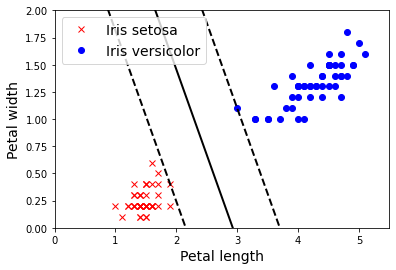

In [63]:
plt.axis([0,5.5,0,2])
plt.plot(X[:,0][y==0],X[:,1][y==0], 'rx', label='Iris setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'bo', label='Iris versicolor')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [65]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge')
sgd.fit(X,y)

SGDClassifier()

In [66]:
w = sgd.coef_
b = sgd.intercept_

w

array([[7.06297822, 7.65155974]])

In [67]:
b

array([-29.82103303])

In [68]:
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0,0]/w[0,1] * x0 - b[0]/w[0,1]

margin = 1/w[0,1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

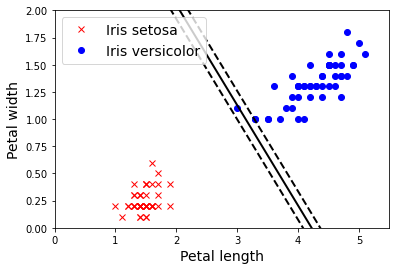

In [69]:
plt.axis([0,5.5,0,2])
plt.plot(X[:,0][y==0],X[:,1][y==0], 'rx', label='Iris setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'bo', label='Iris versicolor')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc="upper left", fontsize=14)

# Exercise 9

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [4]:
type(X_train)

numpy.ndarray

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [75]:
type(mnist)

sklearn.utils.Bunch

In [5]:
# Scaling the data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [6]:
#Picking a smaller set to test hyperparams
X_little = X_train_sc[:1000]
y_little = y_train[:1000]

In [79]:
svc = SVC(C=1.0, kernel='rbf')

In [7]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(svc, X_little, y_little, cv=3, scoring="accuracy")

array([0.85329341, 0.82282282, 0.84684685])

In [82]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.33, 1.0, 3.0, 9.0], 'kernel':['linear', 'rbf','poly'], 'degree':[2, 3, 4], 'gamma':['scale', 'auto']}


In [86]:
svc = SVC()
gridsrch = GridSearchCV(svc, params, cv=3, verbose=3)

In [87]:
gridsrch.fit(X_little, y_little)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END C=0.33, degree=2, gamma=scale, kernel=linear;, score=0.868 total time=   0.1s
[CV 2/3] END C=0.33, degree=2, gamma=scale, kernel=linear;, score=0.865 total time=   0.1s
[CV 3/3] END C=0.33, degree=2, gamma=scale, kernel=linear;, score=0.832 total time=   0.1s
[CV 1/3] END C=0.33, degree=2, gamma=scale, kernel=rbf;, score=0.805 total time=   0.3s
[CV 2/3] END C=0.33, degree=2, gamma=scale, kernel=rbf;, score=0.781 total time=   0.3s
[CV 3/3] END C=0.33, degree=2, gamma=scale, kernel=rbf;, score=0.775 total time=   0.3s
[CV 1/3] END C=0.33, degree=2, gamma=scale, kernel=poly;, score=0.371 total time=   0.2s
[CV 2/3] END C=0.33, degree=2, gamma=scale, kernel=poly;, score=0.628 total time=   0.2s
[CV 3/3] END C=0.33, degree=2, gamma=scale, kernel=poly;, score=0.315 total time=   0.2s
[CV 1/3] END C=0.33, degree=2, gamma=auto, kernel=linear;, score=0.868 total time=   0.1s
[CV 2/3] END C=0.33, degree=2, gamma=auto, k

[CV 1/3] END C=1.0, degree=4, gamma=scale, kernel=rbf;, score=0.853 total time=   0.2s
[CV 2/3] END C=1.0, degree=4, gamma=scale, kernel=rbf;, score=0.823 total time=   0.3s
[CV 3/3] END C=1.0, degree=4, gamma=scale, kernel=rbf;, score=0.847 total time=   0.3s
[CV 1/3] END C=1.0, degree=4, gamma=scale, kernel=poly;, score=0.186 total time=   0.2s
[CV 2/3] END C=1.0, degree=4, gamma=scale, kernel=poly;, score=0.300 total time=   0.2s
[CV 3/3] END C=1.0, degree=4, gamma=scale, kernel=poly;, score=0.186 total time=   0.2s
[CV 1/3] END C=1.0, degree=4, gamma=auto, kernel=linear;, score=0.868 total time=   0.1s
[CV 2/3] END C=1.0, degree=4, gamma=auto, kernel=linear;, score=0.865 total time=   0.1s
[CV 3/3] END C=1.0, degree=4, gamma=auto, kernel=linear;, score=0.832 total time=   0.1s
[CV 1/3] END C=1.0, degree=4, gamma=auto, kernel=rbf;, score=0.853 total time=   0.3s
[CV 2/3] END C=1.0, degree=4, gamma=auto, kernel=rbf;, score=0.835 total time=   0.3s
[CV 3/3] END C=1.0, degree=4, gamma=

[CV 2/3] END C=9.0, degree=3, gamma=scale, kernel=poly;, score=0.781 total time=   0.2s
[CV 3/3] END C=9.0, degree=3, gamma=scale, kernel=poly;, score=0.721 total time=   0.2s
[CV 1/3] END C=9.0, degree=3, gamma=auto, kernel=linear;, score=0.868 total time=   0.1s
[CV 2/3] END C=9.0, degree=3, gamma=auto, kernel=linear;, score=0.865 total time=   0.1s
[CV 3/3] END C=9.0, degree=3, gamma=auto, kernel=linear;, score=0.832 total time=   0.1s
[CV 1/3] END C=9.0, degree=3, gamma=auto, kernel=rbf;, score=0.868 total time=   0.3s
[CV 2/3] END C=9.0, degree=3, gamma=auto, kernel=rbf;, score=0.862 total time=   0.3s
[CV 3/3] END C=9.0, degree=3, gamma=auto, kernel=rbf;, score=0.856 total time=   0.3s
[CV 1/3] END C=9.0, degree=3, gamma=auto, kernel=poly;, score=0.749 total time=   0.2s
[CV 2/3] END C=9.0, degree=3, gamma=auto, kernel=poly;, score=0.733 total time=   0.2s
[CV 3/3] END C=9.0, degree=3, gamma=auto, kernel=poly;, score=0.730 total time=   0.2s
[CV 1/3] END C=9.0, degree=4, gamma=sc

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.33, 1.0, 3.0, 9.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [90]:
gridsrch.best_params_

{'C': 9.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [91]:
gridsrch.best_score_

0.8619937302572033

In [92]:
params2 = {'C':[0.1, 0.33, 0.66, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 15.0, 20.0], 'kernel':['rbf'], 'gamma':['scale', 'auto']}
gridsrch = GridSearchCV(svc, params2, cv=3, verbose=3)
gridsrch.fit(X_little, y_little)

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.497 total time=   0.3s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.529 total time=   0.3s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.492 total time=   0.3s
[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.500 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.535 total time=   0.3s
[CV 3/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.498 total time=   0.3s
[CV 1/3] END ...C=0.33, gamma=scale, kernel=rbf;, score=0.805 total time=   0.3s
[CV 2/3] END ...C=0.33, gamma=scale, kernel=rbf;, score=0.781 total time=   0.3s
[CV 3/3] END ...C=0.33, gamma=scale, kernel=rbf;, score=0.775 total time=   0.3s
[CV 1/3] END ....C=0.33, gamma=auto, kernel=rbf;, score=0.805 total time=   0.3s
[CV 2/3] END ....C=0.33, gamma=auto, kernel=rbf;, score=0.790 total time=   0.3s
[CV 3/3] END ....C=0.33, gamma=auto, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.33, 0.66, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0,
                               15.0, 20.0],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             verbose=3)

In [93]:
gridsrch.best_params_

{'C': 5.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [94]:
gridsrch.best_score_

0.8639927352502204

In [95]:
gridsrch.best_estimator_

SVC(C=5.0, gamma='auto')

In [96]:
svc = gridsrch.best_estimator_

In [8]:
from sklearn.svm import SVC

svc = SVC(C=5.0, gamma='auto')

In [9]:
cross_val_score(svc, X_train_sc, y_train, cv=3, scoring="accuracy", verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.968) total time= 6.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.6min remaining:    0.0s


[CV] END ................................ score: (test=0.966) total time= 6.6min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.3min remaining:    0.0s


[CV] END ................................ score: (test=0.967) total time= 6.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 19.8min finished


array([0.9682 , 0.96645, 0.967  ])

# Exercise 10

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing["data"]
y = housing["target"]

In [14]:
housing['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [6]:
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
type(y)

pandas.core.series.Series

In [12]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

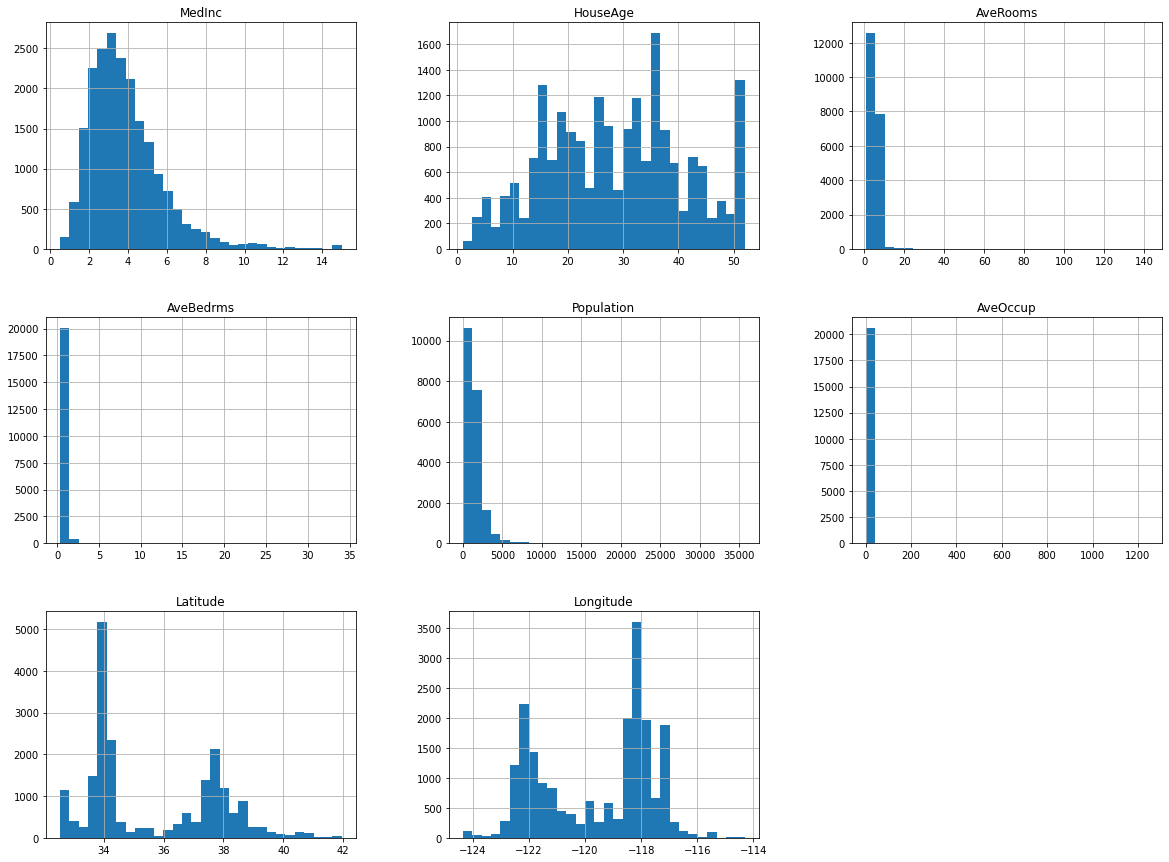

In [23]:
X.hist(bins=30, figsize=(20,15), grid=True)

array([[<AxesSubplot:title={'center':'AveRooms'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>]], dtype=object)

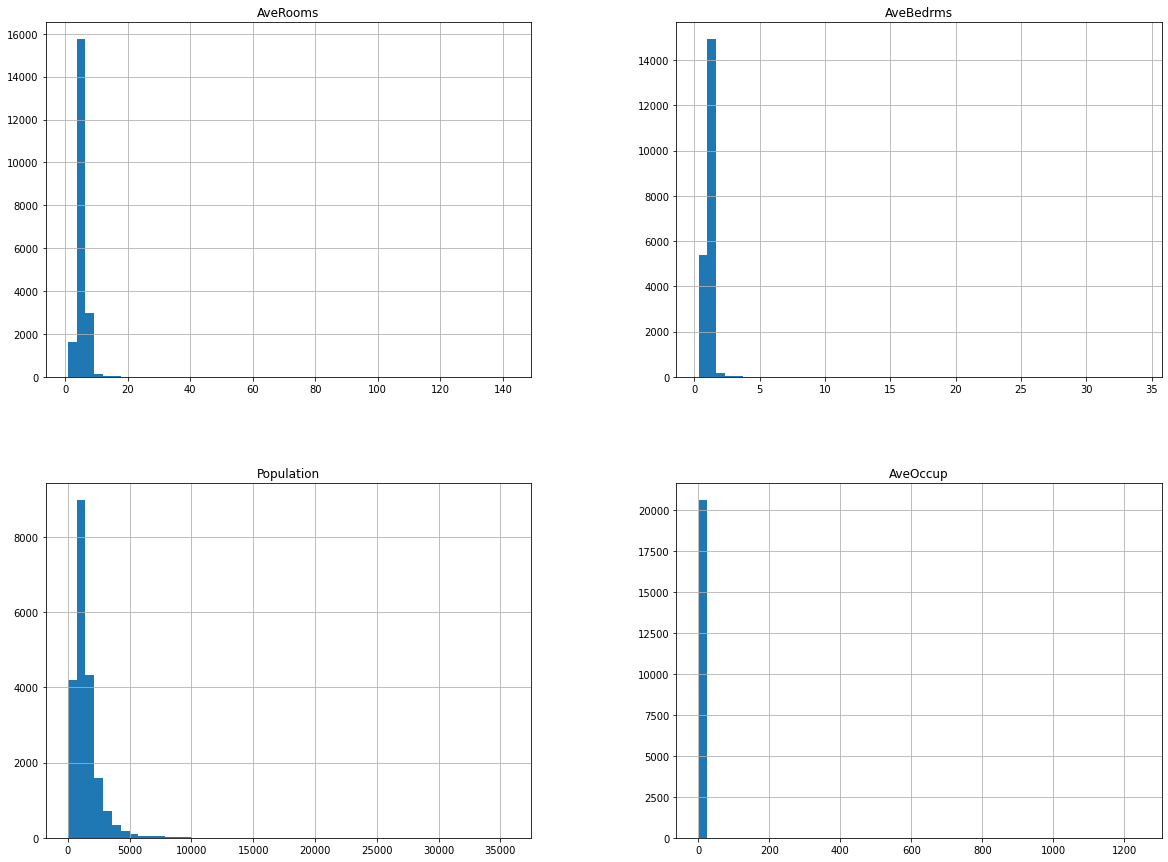

In [35]:
X[['AveRooms','AveBedrms','Population','AveOccup' ]].hist(bins=50, figsize=(20,15), grid=True)

In [39]:
X_sc = scaler.fit_transform(X)

In [40]:
X_sc

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

In [46]:
from sklearn.svm import SVR

svr = SVR()

In [62]:
y_train_arr = np.array(y_train).astype(float)

In [65]:
from sklearn.model_selection import cross_val_score

cross_val_score(svr, X_train[:1000], y_train[:1000], cv=3, verbose=5)

[CV] END ................................ score: (test=0.639) total time=   0.0s
[CV] END ................................ score: (test=0.618) total time=   0.0s
[CV] END ................................ score: (test=0.688) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


array([0.63942859, 0.61849738, 0.68797617])

In [61]:
np.array(y_train).astype(float)

array([1.582, 4.5  , 1.25 , ..., 1.25 , 3.088, 4.636])

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svr, param_distributions, n_iter=10, verbose=3, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:6000], y_train[:6000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=4.745401188473625, gamma=0.07969454818643928;, score=0.720 total time=   1.3s
[CV 2/3] END C=4.745401188473625, gamma=0.07969454818643928;, score=0.748 total time=   1.4s
[CV 3/3] END C=4.745401188473625, gamma=0.07969454818643928;, score=0.721 total time=   1.5s
[CV 1/3] END C=8.31993941811405, gamma=0.015751320499779724;, score=0.684 total time=   1.3s
[CV 2/3] END C=8.31993941811405, gamma=0.015751320499779724;, score=0.708 total time=   1.4s
[CV 3/3] END C=8.31993941811405, gamma=0.015751320499779724;, score=0.687 total time=   1.5s
[CV 1/3] END C=2.560186404424365, gamma=0.002051110418843397;, score=0.590 total time=   1.4s
[CV 2/3] END C=2.560186404424365, gamma=0.002051110418843397;, score=0.632 total time=   1.3s
[CV 3/3] END C=2.560186404424365, gamma=0.002051110418843397;, score=0.590 total time=   1.3s
[CV 1/3] END C=1.5808361216819946, gamma=0.05399484409787431;, score=0.691 total time=   1.3s
[CV 2

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb61aa0b00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb61aa06a0>},
                   random_state=42, verbose=3)

In [74]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [75]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.5990924757047532